# Featured Numbers, Part 0: Introduction

While [all numbers are interesting](https://en.wikipedia.org/wiki/Interesting_number_paradox), prior research has found that some numbers are more popular than others ([Guglielmetti, 2009](https://www.drgoulu.com/2009/04/18/nombres-mineralises/); [Gauvrit, Delahaye, Zenil, 2011](https://arxiv.org/abs/1101.4470)).  This prior research was on the [Online Encyclopedia of Integer Sequences (OEIS)](http://oeis.org/), which is exactly what it claims to be.  In this series, we'll look at the popularity of numbers on two popular math YouTube channels, as well as in OEIS.

[Numberphile](https://www.youtube.com/user/numberphile/) is a YouTube channel that's "[Videos about numbers - it's that simple.](https://www.youtube.com/user/numberphile/about)".  It's perhaps the most popular Youtube channel devoted to math, with over two million subscribers and 300 million views as of December 14, 2017.  One frequent contributor to Numberphile is Matt Parker, who has his own YouTube channel, [standupmaths](https://www.youtube.com/user/standupmaths/), where he does "[mathematics and stand-up. Sometimes simultaneously. Occasionally while being filmed. (It's quite the Venn diagram.)](https://www.youtube.com/user/standupmaths/about)"  I strongly recommend subscribing to both channels if you aren't already.

## History

This project actually began as [a disco calculator for a friend's daughter](https://github.com/lipschultz/diabicus), inspired by [Sam's Disco Calculator](https://www.youtube.com/watch?v=YfIQ7ktFM1g).  For each calculation, the calculator would show a fact related to the calculation or result.  I collected these facts from Numberphile and standupmaths videos.  Eventually, I realized that I have a bunch of data, it'd be ashame if I didn't explore the data (I may also have been inspired by [Sloane's Gap](https://www.youtube.com/watch?v=_YysNM2JoFo).)

## About the Data

Only videos on Numberphile and standupmaths are included in the data.  Hidden videos on those channels that are linked to from a visible video on those channels are included.  Other hidden videos, and private videos, are not included.  [Numberphile2](https://www.youtube.com/channel/UCyp1gCHZJU_fGWFf2rtMkCg) and [Matt Parker](https://www.youtube.com/channel/UCzV9N7eGedBchEQjQhPapyQ) are not included.  The analysis includes videos up to December 12, 2017, giving a total of 359 Numberphile videos and 98 standupmaths videos.  There are many other math channels on YouTube, but the data collection and analysis are left as exercises to the reader.

The data used in this analysis can be found: [https://github.com/lipschultz/diabicus/blob/d1b1bb2020c6b6ad8e446dbc7d719efc6155a3c5/resources/youtube.json](https://github.com/lipschultz/diabicus/blob/d1b1bb2020c6b6ad8e446dbc7d719efc6155a3c5/resources/youtube.json)

### Annotations

For each video, the following information was recorded:
- URL - YouTube link to video
- Title - title of YouTube video
- Hosts - people talking about the math/number(s) in the video, but not necessarily everyone involved in making or appearing in the video (e.g. the hosts for [MENACE: the pile of matchboxes which can learn](https://www.youtube.com/watch?v=R9c-_neaxeU) are just Matt Parker, Matthew Scroggs, and Katie Steckles)
- Date published
- Source ("Numberphile", "standupmaths")
- links to any relevant [Online Encyclopedia of Integer Sequences (OEIS)](http://oeis.org/) or [Wikipedia](https://en.wikipedia.org/) page
- Test - used to determine what numbers or calculations occur in the video

`Test` is what we'll use to determine whether a number is "featured" in a video.  The test is a python function that takes a formula, its result, and the context (i.e. calculation history), and returns True if the formula, result, or context are relevant to the video.  I chose to use a function instead of recording the set of numbers (as is done in OEIS) since some sets would be very large (e.g. set of all integers).

This analysis suffers from having only one annotator: me.  I have probably been inconsistent in my annotations over the months I spent watching and annotating videos, and the threshold for a number to "feature" in a video is very vague.  In my defense, the data was originally intended to supplement a child's disco calculator, so I didn't approach this with the rigor I maybe should have.  Therefore, I welcome annotations from others to establish inter-rater reliability and improve the overall tags.

Some guidelines I used for determining whether a number was "featured" in the video:

- If the video is about random numbers or randomness (e.g. [An unexpected way to inflate a balloon](https://www.youtube.com/watch?v=un-pTKfC1dQ)), then the video will match a random number in the range [0, 1).
- When a constant is calculated and the error is mentioned (e.g. [computing pi using pies](https://www.youtube.com/watch?v=ZNiRzZ66YN0)), any number within that error range of the constant is considered "featured" in the video.
- Numbers that show up in illustrative examples do not qualify as being featured in the video
    - e.g. [a video about parabolas](https://www.youtube.com/watch?v=zXoJlRFbktw) will use some numbers as coefficients and x or y values, but those numbers aren't "featured" in the video
    - e.g. the [triplets in Apéry's constant](https://www.youtube.com/watch?v=ur-iLy4z3QE)
- Some videos just aren't obviously about numbers (Todashi's Toys are a good example), so these videos don't match any numbers.
- If a set is talked about (e.g. prime numbers or Fibonnacci sequence) but only some numbers from the sequence are included, "all" numbers in the set are considered featured in the video (well, all numbers up to the max I'm considering in this analysis or up to what's included in OEIS or Wikipedia).
    - If a video is about numbers in general (e.g. [Philosophy of Numbers](https://www.youtube.com/watch?v=vA2cdHLKYB8)), then it features all numbers.
    - If a video is about a kind of number (e.g. [Surreal Numbers (writing the first book)](https://www.youtube.com/watch?v=mPn2AdMH7UQ)), then all numbers of that kind are featured.

### Counting Featured Numbers

For the analysis in this project, we're only interested in whether a number is "featured" in the video, so we feed that number in as the `result` to the test function; the `formula` that generated that result will also be the number; no additional calculation history is provided.  If the test function returns True, then the number is featured in the video.

While studying the popularity of all numbers would be interesting, time and space constraints limit the set of numbers to consider.   Drawing from previous work on the popularity of integers in OEIS (see [Sloane's Gap](https://www.youtube.com/watch?v=_YysNM2JoFo)), bounds were set at [-10000, +10001) for both real and imaginary numbers.  Along the real axis (a + 0i) and the imaginary axis (0 + bi), we take 0.01-step increments.  For all other complex numbers (a + bi, for a, b != 0), we take unit steps for both a and b.

The code for determining whether a number is featured in a video can be found here: [https://github.com/lipschultz/diabicus/blob/gap-analysis/number-analysis/compute_popularity.py](https://github.com/lipschultz/diabicus/blob/gap-analysis/number-analysis/compute_popularity.py)

## A Brief Word About OEIS

Since some of the analysis will include the [Online Encyclopedia of Integer Sequences (OEIS)](http://oeis.org/), a brief introduction is in order.  The OEIS is exactly what it claims to be: an encyclopedia of integer sequences.  No non-integer values occur in the sequences (although sequences can be about non-integer numbers, e.g. [A000796](http://oeis.org/A000796)), nor are there sequences containing imaginary numbers (although sequences can be about imaginary numbers, e.g. [A002410](http://oeis.org/A002410)).

The data used in this analysis was downloaded on December 15, 2017 and consists of 296 522 sequences ([download link](http://oeis.org/stripped.gz)).  Unlike the data on the videos, OEIS records a list of numbers in the sequence and [generally caps it at about 180 to 210 characters in a sequence (including commas)](http://oeis.org/FAQ.html#Z07b).  While generating functions in various programming languages are sometimes available, they are not used in this analysis.  Unfortunately, this has the effect of numbers occurring in a sequence, but not being included in OEIS's rendering of the sequence and therefore not being included in this analysis.

Previous work on the popularity of numbers in OEIS counted the total number of occurrences of a number in OEIS.  If a number occurred more than once in a sequence, it was counted each time.  However, in this series of posts, to be consistent with how I counted numbers in the YouTube videos, I instead count the sequences a number occurs in.  For example, in sequence [A000796](http://oeis.org/A000796) (the digits of Pi), the number `1` occurs nine times.  In the Sloane's Gap paper, `1`'s count would increase by nine, while in this analysis it increases by one.

Code for adding the OEIS data to the database of feature numbers can be found here: [https://github.com/lipschultz/diabicus/blob/gap-analysis/number-analysis/compute_oeis_popularity.py](https://github.com/lipschultz/diabicus/blob/gap-analysis/number-analysis/compute_oeis_popularity.py)

## Featured Figures and Future Figuring

Important numbers for today's post:

- 359 Numberphile videos annotated
- 98 standupmaths videos annotated
- 1 annotator for videos
- 296 522 OEIS sequences included

With the introduction and overview out of the way, next time we'll take a look at the data and attempt to replicate the prior findings on OEIS.

# Featured Numbers, Part 1: Popularity of Positive Rationals in OEIS

This is the second part in a series examining the popularity of numbers featured in various math resources.  In the first part, we reviewed the data to be used in this analysis.  In this part, we'll finally start doing some analysis!  We'll start with a quick overview of the popularity of numbers across the three sources.  Then we'll dive into the OEIS data by trying to replicate the results in the [Sloane's Gap paper](https://arxiv.org/abs/1101.4470) ([Numberphile video on the topic](https://www.youtube.com/watch?v=_YysNM2JoFo)).

## Loading Data

At this point, we assume that the raw json data from the YouTube channels and the csv data from OEIS have been loaded into a sqlite database (using the scripts from [https://github.com/lipschultz/diabicus/blob/gap-analysis/number-analysis/](https://github.com/lipschultz/diabicus/blob/gap-analysis/number-analysis/)).  Let's load all the positive rational data, since in future posts we'll be comparing all of them (and I'm eager to see how Numberphile and standupmaths compare to OEIS).

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('data/data.db')
df_positive_rational = pd.read_sql_query('''SELECT V.source, C.real_part AS number, COUNT(*) AS count
                                            FROM counts C, videos V
                                            WHERE C.imag_part == 0 AND
                                                  C.video_id = V.video_id AND
                                                  0 <= C.real_part AND
                                                  C.real_part <= 10000
                                            GROUP BY V.source, C.real_part''',
                                         conn)

Because each source has a different number of videos/sequences (from 98 with standupmaths to 296522 with OEIS), we need to normalize by the number of videos/sequences. In the code below, a new column is added (named pct) to store the percent of videos/sequences that each number occurs in.

In [2]:
df_source = pd.read_sql_query('''SELECT source, COUNT(*) as total
                                 FROM videos
                                 GROUP BY source''',
                              conn, index_col='source')
source_totals = df_source['total'].to_dict()
df_positive_rational['pct'] = df_positive_rational.apply(lambda row: row['count']/source_totals[row['source']], axis=1)

## Qualitative Comparison of Sources

With the data loaded, let's take a look at the popularity!

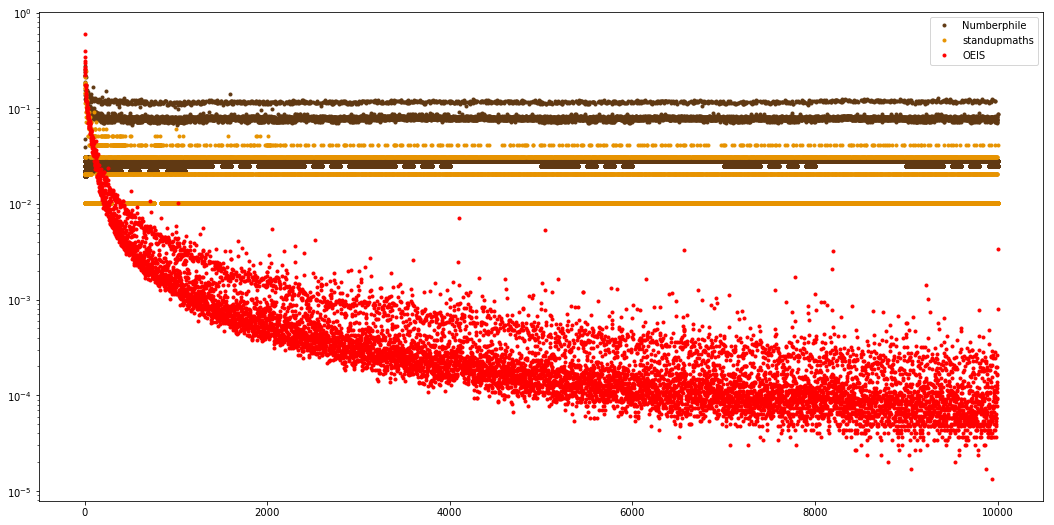

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (18, 9)

colors = {'Numberphile': '#603913', 'standupmaths': '#e79300', 'OEIS': '#ff0000'}

for source, color in colors.items():
    d = df_positive_rational[df_positive_rational['source'] == source]
    plt.semilogy(d.number, d['pct'], marker='.', linestyle='', color=color, label=source)

plt.legend()
plt.show()

The graph above shows OEIS popularity in red, standupmaths in yellow, and Numberphile in brown.  The y-axis is logscale.  A few interesting things pop out in this graph.

First, notice that the Numberphile and standupmaths plots are mostly straight lines.  Close to zero, there appears to be a downward trend, like with the OEIS data, but it quickly levels off.  This is in stark contrast with OEIS, which has a general downward trend throughout the graph.  OEIS not leveling off may be due to their length threshold on each sequence -- bigger numbers may be dropped due to space restrictions.  However, there may be fundamental differences between OEIS and the two YouTube channels.  The people who decide what numbers/sequences to include are different (OEIS has a panel of mathematicians, Numberphile has Dr. Haran and mathematicians, standupmaths has Matt Parker and his guests), possibly leading to different focuses.

Both Numberphile and standupmaths have very clearly-defined gaps compared to OEIS.  This might be due to just having less videos than OEIS has sequences.  By having a lot of sequences, there's also a finer granularity between 0% and 100%, allowing for a muddier gap.  Having more sequences also allows for less popular sequences (e.g. [OEIS keywords](http://oeis.org/eishelp2.html#RK) "dumb", "less", or "obsc"), which Numberphile and standupmaths haven't gotten to (yet?).  Or, it could be due to OEIS capping off its sequences, which could lead to some popular numbers not showing up as often as they should.  If that's the case, one would expect to see a cleaner gap in the OEIS data for smaller integers, but it's not clear there is in the graph above.

Finally, almost all OEIS data points are below the other two sources.  This is likely because there are just more sequences in OEIS than videos in Numberphile and standupmaths, and each number just shows up in a small percentage of those sequences.

Now let's dive into the details of the specific curves, starting with OEIS!

## Positive Integers in OEIS

In the graph above, notice that the OEIS data is similar to Figure 1 from the [Sloane's Gap paper](https://arxiv.org/abs/1101.4470), which we'd expect since the data is largely identical.  While there is still a noticeable gap between two "clouds" (as Gauvrit et al. call the two fairly separate regions), it is less pronounced than in the Sloane's Gap paper.  I suspect the difference is in how we counted occurrences: the Sloane's Gap paper counts all occurrences of a number, while this analysis counts the sequences a number appears in.

### Curve

The popularity of positive integers in OEIS is generally decreasing as the number increases, appearing to be a logarithmic curve as was used in the Sloane's Gap paper.  Fitting a logarithmic curve to the data shows that it is:

In [5]:
import numpy as np
from scipy import stats

oeis = df_positive_rational[df_positive_rational['source'] == 'OEIS'].copy()

oeis_regression = stats.linregress(np.log(oeis.number[1:]), np.log(oeis['pct'][1:]))
print('OEIS regression:', oeis_regression)
print('popularity = %f * n^%f' % (np.exp(oeis_regression.intercept), oeis_regression.slope))
oeis_best_fit = lambda n: np.exp(oeis_regression.intercept) * n**oeis_regression.slope

OEIS regression: LinregressResult(slope=-1.2936573821919723, intercept=2.5035990376186987, rvalue=-0.91845336952248591, pvalue=0.0, stderr=0.0055716551335381085)
popularity = 12.226418 * n^-1.293657


The curve is a very good fit at p ≈ 0.0 and r^2 = 0.84 (compared to r^2 = 0.81 in the Sloane's Gap paper).  The slope/exponent is also very similar to the one found in Sloane's Gap paper (exponent = -1.33).

### Classifying the Popular Numbers

As with the Sloane's Gap paper, determining which numbers are popular will be done empirically.  Two curves will determine popularity for the regions [0, 185) and [185, 500).  For 500 and above, I use the same method as Gauvrit et al.: numbers with a popularity above the 82 percentile within the range [n-c, n+c] are labeled popular; for n <= 1000, c = 100, for n > 1000, c = 350.

In [6]:
from collections import namedtuple

Point = namedtuple('Point', ['x', 'y'])

def line_from_points(point1, point2):
    m = (point1.y - point2.y) / (point1.x - point2.x)
    b = point1.y - m*point1.x
    return m, b

point1 = Point(100, 0.0219296)
point2 = Point(185, 0.0178644)
m1, b1 = line_from_points(point1, point2)
threshold_curve1 = lambda x: m1 * x + b1

point3 = Point(499, 0.00609301)
point2log = Point(*[np.log(p) for p in point2])
point3log = Point(*[np.log(p) for p in point3])
m2, b2 = line_from_points(point2log, point3log)
threshold_curve2 = lambda x: np.exp(b2 + m2 * np.log(x))

is_popular = []
for i in range(len(oeis)):
    number = oeis.iloc[i]['number']
    pct = oeis.iloc[i]['pct']
    if number < 185:
        is_popular.append(pct > threshold_curve1(number))
    elif number < 500:
        is_popular.append(pct > threshold_curve2(number))
    else:
        window_size = 100 if number <= 1000 else 350
        lower_bound = max(0, i-window_size)
        upper_bound = min(i+window_size, len(oeis)-1)
        interval = oeis.iloc[lower_bound:upper_bound+1]
        threshold_pct = interval['pct'].quantile(0.82)
        is_popular.append(pct > threshold_pct)

oeis['is_popular'] = is_popular

The figure below shows the classified numbers, the two curves, as well as the fit for all the data from the previous section.  We also see that there are 1964 positive integers in the popular set.

Number of popular integers: 1964
Number of unpopular integers: 8037


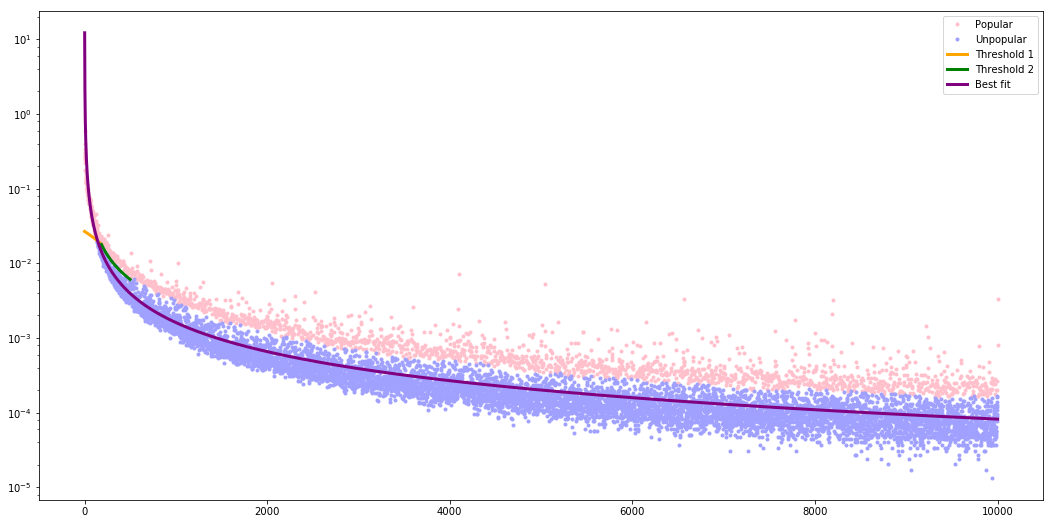

In [9]:
oeis_popular = oeis[oeis.is_popular]
oeis_regular = oeis[~oeis.is_popular]

print('Number of popular integers:', len(oeis_popular))
print('Number of unpopular integers:', len(oeis_regular))

plt.semilogy(oeis_popular.number, oeis_popular['pct'], label='Popular', c='pink', marker='.', linestyle='')
plt.semilogy(oeis_regular.number, oeis_regular['pct'], label='Unpopular', c='#a0a0ff', marker='.', linestyle='')
x_1 = [x for x in range(0, 185)]
plt.semilogy(x_1, [threshold_curve1(x) for x in x_1], label='Threshold 1', c='orange', marker='', linestyle='-', linewidth=3)
x_2 = [x for x in range(185, 500)]
plt.semilogy(x_2, [threshold_curve2(x) for x in x_2], label='Threshold 2', c='green', marker='', linestyle='-', linewidth=3)
plt.semilogy(oeis.number[1:], oeis.number[1:].apply(oeis_best_fit), label='Best fit', c='purple', marker='', linestyle='-', linewidth=3)
plt.legend()
plt.show()

### Characterizing the Popular Numbers

Now that we've classified the numbers, let's find out who's in the popular class.

Prior work by [Guglielmetti](https://www.drgoulu.com/2009/04/18/nombres-mineralises/) and [Gauvrit et al.](https://arxiv.org/abs/1101.4470) found that the popular positive integers to tend belong to one or more of these sets:
- `primes`: Prime numbers
- `powers`: Numbers of the form a^b (for a,b ∈ **N**)
- `squares`: Square numbers
- `2^n-1`: Numbers one less than a power of 2
- `2^n+1`: Numbers one more than a power of 2
- A multitude of factors
    - `highly_composites`: Guglielmetti defines this as having more divisors than any lower number (i.e. highly composite numbers, see [5040 and other Anti-Prime Numbers](https://www.youtube.com/watch?v=2JM2oImb9Qg))
    - `many_prime_factors`: Gauvrit et al. defines this as when "the number of prime factors (with their multiplicty) exceeds the 95th percentile, corresponding to the interval [n − 100, n + 100]"

The code below tags each number for whether it belongs to one of those five sets.

In [10]:
import sys
sys.path.append('../src')
import numeric_tools


def get_powers_of(base, starting_exponent=2, no_values_above=10000):
    values = []
    exponent = starting_exponent
    value = base ** exponent
    while value <= no_values_above:
        values.append(value)
        exponent += 1
        value = base ** exponent
    return values


def tag_with_sets_from_prior_work(df):
    MAX_NUMBER = df.number.max()
    set_names = []
    
    df['is_prime'] = df.number.apply(numeric_tools.is_prime)
    set_names.append('is_prime')
    
    powers = set()
    squares = [1] # To be consistent with Guglielmetti, who includes 1
    base = 2
    base_powers = get_powers_of(base, no_values_above=MAX_NUMBER)
    powers_of_2 = [1] + base_powers
    while len(base_powers) > 0:
        powers.update(base_powers)
        squares.append(base_powers[0])
        base += 1
        base_powers = get_powers_of(base, no_values_above=MAX_NUMBER)
    df['is_power'] = df.number.apply(lambda n: n in powers)
    df['is_square'] = df.number.apply(lambda n: n in squares)
    set_names.append('is_power')
    set_names.append('is_square')
    
    one_less_than_power_of_two = [n - 1 for n in powers_of_2]
    df['is_2^n-1'] = df.number.apply(lambda n: n in one_less_than_power_of_two)
    set_names.append('is_2^n-1')
    
    one_more_than_power_of_two = [n + 1 for n in powers_of_2]
    df['is_2^n+1'] = df.number.apply(lambda n: n in one_more_than_power_of_two)
    set_names.append('is_2^n+1')
    
    more_divisors_than_predecessors = [1] # To be consistent with Guglielmetti, who includes 1
    max_divisor_count = 1
    n = 2
    while n <= MAX_NUMBER:
        divisor_count = len(numeric_tools.factors(n, numeric_tools.FACTORS_ALL))
        if divisor_count > max_divisor_count:
            more_divisors_than_predecessors.append(n)
            max_divisor_count = divisor_count
        n += 1
    df['is_highly_composite'] = df.number.apply(lambda n: n in more_divisors_than_predecessors)
    set_names.append('is_highly_composite')
    
    df['prime_factor_count'] = df.number.apply(lambda n: len(numeric_tools.factors(n, numeric_tools.FACTORS_PRIME)))
    has_many_prime_factors = []
    for i in range(len(df)):
        lower_bound = max(0, i-100)
        upper_bound = min(i+100, len(df)-1)
        interval = df.iloc[lower_bound:upper_bound+1]
        threshold_95pct = interval.prime_factor_count.quantile(0.95)
        has_many_prime_factors.append(df.iloc[i].prime_factor_count > threshold_95pct)
    df['has_many_prime_factors'] = has_many_prime_factors
    set_names.append('has_many_prime_factors')
    
    df['any_prior_work_set'] = False
    for set_name in set_names:
        df['any_prior_work_set'] |= df[set_name]
    set_names.append('any_prior_work_set')
    return set_names


prior_work_set_names = tag_with_sets_from_prior_work(oeis)
oeis['popularity_group'] = oeis.is_popular

Now let's look at the results!

In [11]:
def show_interesting_set_statistics(df_set, set_label, show_examples_if_count_below=31, groupby='popularity_group'):
    groups = df_set.groupby(groupby)
    group_stats = pd.DataFrame(groups.number.count())
    group_stats.rename(columns={'number':'count'}, inplace=True)
    group_stats['pct_of_set'] = group_stats['count'].apply(lambda c: c / len(df_set))
    print(set_label, 'statistics:')
    print(group_stats)
    for i, group in group_stats.iterrows():
        if group['count'] <= show_examples_if_count_below:
            values = ['%d' % v for v in groups.get_group(i).number.values]
            print('Numbers in group', i, ':', values)


def summarize_interesting_sets(df, interesting_sets):
    for set_label in interesting_sets:
        print(set_label)
        df_set = df[df[set_label]]
        print('Set size: %d (%0.2f%% of all numbers considered)' % (len(df_set), 100 * len(df_set) / len(df)))
        show_interesting_set_statistics(df_set, set_label)
        
        df_set = df[~df[set_label]]
        show_interesting_set_statistics(df_set, 'not '+set_label, 0)
        print()

summarize_interesting_sets(oeis, prior_work_set_names)

is_prime
Set size: 1229 (12.29% of all numbers considered)
is_prime statistics:
                  count  pct_of_set
popularity_group                   
False                26    0.021155
True               1203    0.978845
Numbers in group False : ['947', '983', '1699', '2843', '2963', '3083', '3187', '3923', '4327', '4363', '5791', '5903', '5987', '6287', '6703', '6823', '7237', '7243', '7643', '7933', '8539', '8623', '8863', '8963', '9467', '9743']
not is_prime statistics:
                  count  pct_of_set
popularity_group                   
False              8011    0.913247
True                761    0.086753

is_power
Set size: 124 (1.24% of all numbers considered)
is_power statistics:
                  count  pct_of_set
popularity_group                   
False                 8    0.064516
True                116    0.935484
Numbers in group False : ['196', '243', '289', '343', '361', '484', '529', '676']
not is_power statistics:
                  count  pct_of_set
popularit

From the results above, we see that these sets from prior work still do a good job of describing many of the popular numbers in OEIS.  In particular:
- `primes` are a very good discriminator:
    - 97.9% of primes are popular
    - 91.3% of non-primes are not popular
- `powers` are a good discriminator:
    - 93.5% of powers are popular
    - 81.3% of non-powers are not popular
- `squares` are about as good as `powers` at discriminating:
    - 94% of squares are popular
    - 81.1% of non-squares are not popular
- all `2^n-1` are popular numbers, and 80.5% of other numbers are not popular
- all `2^n+1` but one are popular numbers (92.3%), and 80.5% of other numbers are not popular
- all `highly_composites` are popular numbers, and 80.5% of non-highly-composite are not popular
- having many prime factors turns out to not be a good discriminator in this dataset (but better than observed by Gauvrit et al. in the Sloane's Gap paper)
    - 65.4% of numbers with relatively many prime factors are popular
    - 82.1% of numbers with relatively few prime factors are not popular

Combined, these sets include 1719 positive integers.  Of those integers, 1556 of them (90.5%) are popular.  With 1964 popular integers, 79.2% of them are accounted for by these sets, leaving 408 unaccounted for.

In [15]:
oeis_popular_accounted = oeis[oeis.is_popular & oeis.any_prior_work_set]
oeis_popular_unaccounted = oeis[oeis.is_popular & ~oeis.any_prior_work_set]

print('Unaccounted:', [n for n in oeis_popular_unaccounted.number])
print()

three_repeat_digit = [111, 222, 333, 444, 555, 666, 777, 888, 999]
print('Three-repeat-digit numbers in unaccounted:')
print(oeis_popular_unaccounted[oeis_popular_unaccounted.number.isin(three_repeat_digit)].number.values)
print()

print('Three-repeat-digit numbers in popular:')
print(oeis_popular[oeis_popular.number.isin(three_repeat_digit)].number.values)

Unaccounted: [6.0, 10.0, 14.0, 18.0, 20.0, 21.0, 22.0, 26.0, 28.0, 30.0, 34.0, 35.0, 38.0, 39.0, 40.0, 42.0, 44.0, 45.0, 46.0, 48.0, 50.0, 51.0, 52.0, 54.0, 55.0, 56.0, 57.0, 58.0, 62.0, 66.0, 68.0, 69.0, 70.0, 72.0, 74.0, 75.0, 76.0, 77.0, 78.0, 80.0, 82.0, 84.0, 85.0, 86.0, 87.0, 88.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 98.0, 99.0, 102.0, 104.0, 105.0, 106.0, 108.0, 110.0, 111.0, 112.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 122.0, 123.0, 124.0, 126.0, 130.0, 132.0, 133.0, 135.0, 136.0, 140.0, 143.0, 150.0, 156.0, 168.0, 200.0, 210.0, 252.0, 280.0, 300.0, 330.0, 336.0, 420.0, 462.0, 504.0, 600.0, 630.0, 756.0, 780.0, 924.0, 945.0, 990.0, 1001.0, 1100.0, 1111.0, 1155.0, 1176.0, 1320.0, 1365.0, 1430.0, 1485.0, 1540.0, 1560.0, 1575.0, 1716.0, 1729.0, 1806.0, 1820.0, 1848.0, 1890.0, 1980.0, 2002.0, 2040.0, 2100.0, 2145.0, 2184.0, 2200.0, 2205.0, 2211.0, 2222.0, 2310.0, 2340.0, 2380.0, 2450.0, 2465.0, 2556.0, 2584.0, 2600.0, 2646.0, 2701.0, 2730.0, 2772.0, 2821.0, 2835.0, 2856.0, 2925

Gauvrit et al. suggested that some of these are linked to decimal notation, offering the example that 1111, 2222, ..., 9999 are all in this unaccounted for set.  However, other than those nine numbers, none of them are obviously linked to decimal notation.  For example, of the three-digit version of that sequence, only 111 is in the unaccounted for sequence (it's also the only one in the popular set).

The graph below shows where the unaccounted for popular numbers fall within the OEIS popularity graph.  It seems many of them occur for smaller numbers, before a clear gap begins to appear.  Point 2 (from the section on classifying popular numbers) is a good marker of where a gap just starts appearing -- recall that it's at x=185.  Of the 408 unaccounted for integers, 20.1% are below point 2.  Additionally, 52.9% of all popular integers below point 2 are unaccounted for.  Only 1.85% of all integers are below point 2.  Therefore, it seems being smaller is also an indicator for being popular.

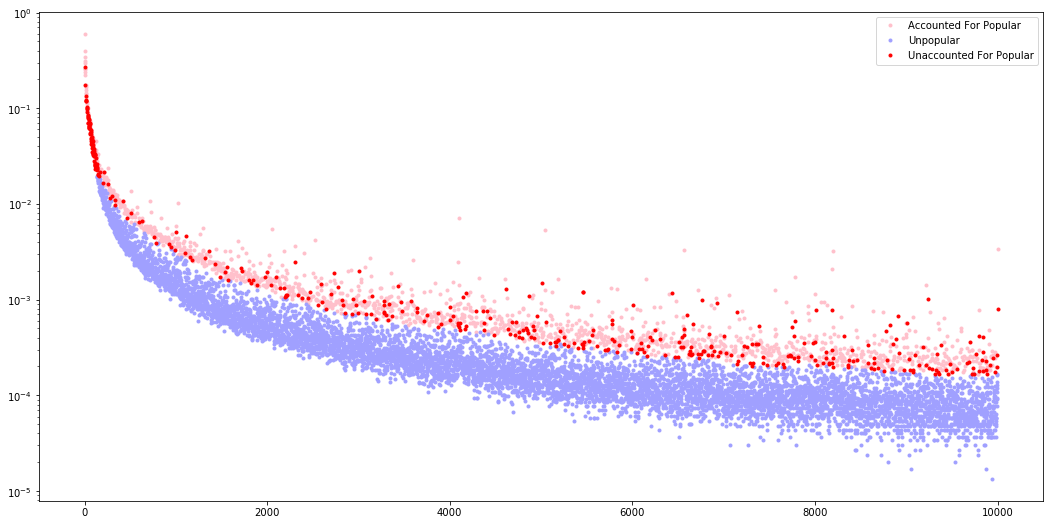

Percent of unaccounted for below point 2: 20.10%
Percent of popular (below point 2) that are unaccounted: 52.90%


In [16]:
plt.semilogy(oeis_popular_accounted.number, oeis_popular_accounted['pct'], c='pink', marker='.', linestyle='', label='Accounted For Popular')
plt.semilogy(oeis_regular.number, oeis_regular['pct'], c='#a0a0ff', marker='.', linestyle='', label='Unpopular')
plt.semilogy(oeis_popular_unaccounted.number, oeis_popular_unaccounted['pct'], c='red', marker='.', linestyle='', label='Unaccounted For Popular')
plt.legend()
plt.show()

count_unaccounted_below_point2 = len([v for v in oeis_popular_unaccounted.number < point2.x if v])
count_all_popular_below_point2 = len([v for v in oeis_popular.number < point2.x if v])
print('Percent of unaccounted for below point 2: %0.2f%%' % (100 * count_unaccounted_below_point2 / len(oeis_popular_unaccounted)))
print('Percent of popular (below point 2) that are unaccounted: %0.2f%%' % (100 * count_unaccounted_below_point2 / count_all_popular_below_point2))

## Featured Figures and Future Figuring

We covered a lot this time:
- We got our first glimpse of the popularity of positive rationals across the three sources, then took a deep dive into the OEIS positive integers.
- The popularity of OEIS positive integers generally follows: popularity = 12.226418 * n^-1.293657 (similar to the [Sloane's Gap paper](https://arxiv.org/abs/1101.4470))
- We found that being prime, a power, one off of being a power of two, being a square number, or being highly composite are all good indicators of being popular.  Having relatively more prime factors than neighboring numbers can also be an indicator, but isn't as good.
- 20.8% of popular integers don't fall into any of those categories though.  Many of them are just small, before a noticeable gap starts appearing.

Overall, we were generally able to replicate the findings from prior work ([Guglielmetti](https://www.drgoulu.com/2009/04/18/nombres-mineralises/) and [Gauvrit et al.](https://arxiv.org/abs/1101.4470)).  Next time, we'll venture into new territory by exploring the Numberphile positive rationals!

# Featured Numbers, Part 2: Numbers on Numberphile
(or, as I've been thinking of it: The Point Where it Gets Interesting)

This is the third part in a series examining the popularity of numbers featured in various math resources. Last time, we looked at the popularity of positive integers in OEIS, generally replicating previous work ([Guglielmetti](https://www.drgoulu.com/2009/04/18/nombres-mineralises/) and [Gauvrit et al.](https://arxiv.org/abs/1101.4470)).  This time, we're going to dive into the unexplored realm of the popularity of positive rationals in [Numberphile videos](https://www.youtube.com/user/numberphile/), a YouTube channel that's "[Videos about numbers - it's that simple.](https://www.youtube.com/user/numberphile/about)".

Last time, we saw a graph of positive rational popularity across OEIS, Numberphile, and standupmaths.  The graph below is just the popularity of positive rationals in Numberphile.

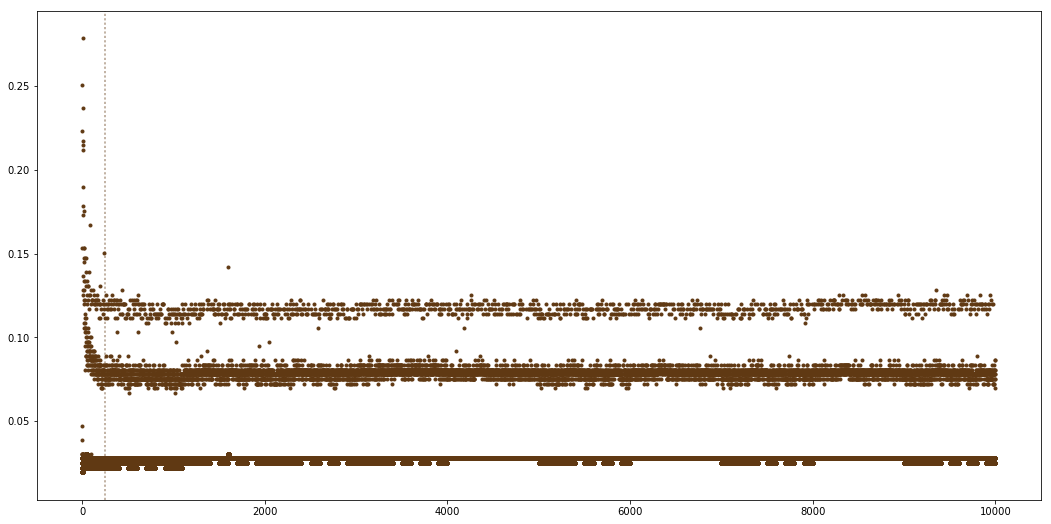

In [17]:
source = 'Numberphile'
numberphile = df_positive_rational[df_positive_rational['source'] == source].copy()

transition_threshold = 250
color = colors[source]
plt.scatter(numberphile.number, numberphile['pct'], marker='.', color=color)
plt.axvline(x=transition_threshold, linestyle='dotted', color=color, alpha=0.5)
plt.show()

## Classifying the Popularity

Unlike with the OEIS data, there are very clearly three levels of popularity here: the popular (pct ≈ 0.115), the somewhat popular (pct ≈ 0.078), and the unpopular (pct ≈ 0.025).  This is in contrast to OEIS, with only two levels of popularity and a muddy gap between them.  However, like OEIS, numbers close to zero are relatively more popular than the line they seem to eventually settle into.  I eye-balled the transition point at around number=250 (the dashed line in the graph).

So who's in each popularity level?  First, let's classify them.  For the flat part, a simple kmeans clustering will do.  For the curved part, I use two simple thresholds to classify the unpopular (pct <= 0.06) and the obviously popular (pct >= 0.15).  For the region between the popular and the somewhat popular, I eyeballed a line that seemed to separate the two (similar to what we did last time for OEIS), going from (12.048, 0.118321) down to (250, 0.0965) -- 0.0965 is the average between my initial guesses for the centers of the popular and somewhat popular lines.

Popularity centers for the flat parts:
 [ 0.11721081  0.07839004  0.02736215]


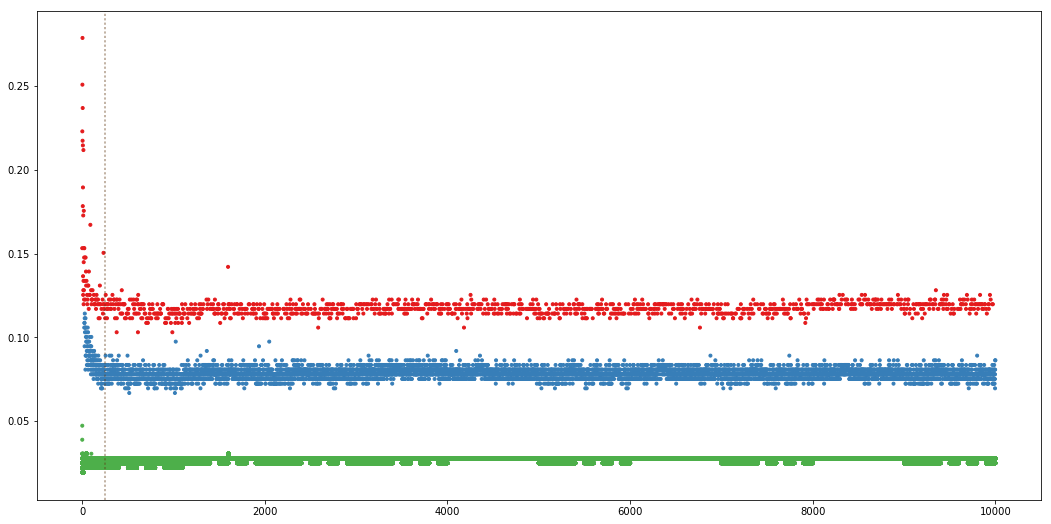

Size of each group:
Group 0
	Size: 1252
	Percent: 0.13%
	Average popularity: 11.86%
Group 1
	Size: 8749
	Percent: 0.87%
	Average popularity: 7.85%
Group 2
	Size: 990000
	Percent: 99.00%
	Average popularity: 2.73%


In [18]:
from scipy.cluster.vq import kmeans2

estimated_popularity_centers = [0.115, 0.078, 0.025]

threshold_index = numberphile.number[numberphile.number == transition_threshold].index[0]
flat_part = numberphile[threshold_index:]
centroids, flat_groups = kmeans2(flat_part.pct, estimated_popularity_centers)
print('Popularity centers for the flat parts:\n', centroids)

curve_part = numberphile[:threshold_index]

def cluster_curved_Numberphile(row):
    if row.pct <= 0.06:
        return 2
    elif row.pct >= 0.15:
        return 0
    else:
        x1, y1 = 12.048, 0.118321
        x2, y2 = 250, (estimated_popularity_centers[0] + estimated_popularity_centers[1])/2
        m = (y1 - y2) / (x1 - x2)
        b = y1 - m * x1
        if row.pct > m * row.number + b:
            return 0
        else:
            return 1

curve_groups = curve_part.apply(cluster_curved_Numberphile, axis='columns')
numberphile['popularity_group'] = np.concatenate([curve_groups, flat_groups])

group_colors = [plt.cm.Set1.colors[g] for g in numberphile['popularity_group']]
plt.scatter(numberphile.number, numberphile['pct'], marker='.', color=group_colors)
plt.axvline(x=250, linestyle='dotted', color=color, alpha=0.5)
plt.show()

print('Size of each group:')
for i in range(3):
    print('Group', i)
    popularity_group = numberphile[numberphile.popularity_group == i]
    size = len(popularity_group)
    print('\tSize:', size)
    print('\tPercent: %0.2f%%' % (100 * size / len(numberphile)))
    print('\tAverage popularity: %0.2f%%' % (100 * popularity_group.mean().pct))

Clusters look good.  Shockingly, 99% of all the positive rationals studied are unpopular (group 2).  What numbers could be so unpopular?

## Characterizing the Unpopular Numbers

I'll start with the unpopular numbers.  I strongly suspect that all the non-integers are in this category since 990000 is exactly how many positive non-integer rationals are included in the analysis.

In [19]:
numberphile_nonintegers = numberphile[numberphile.number % 1 != 0]
print('Categories of non-integers:', numberphile_nonintegers.popularity_group.unique())
print('Total number of non-integers:', len(numberphile_nonintegers))

numberphile_unpopular = numberphile[numberphile.popularity_group == 2]
print('Unpopular number statistics (by count):')
print(numberphile_unpopular['count'].describe())
print('Unpopular number statistics (by pct):')
print(numberphile_unpopular['pct'].describe())

Categories of non-integers: [2]
Total number of non-integers: 990000
Unpopular number statistics (by count):
count    990000.000000
mean          9.802836
std           0.432168
min           7.000000
25%          10.000000
50%          10.000000
75%          10.000000
max          17.000000
Name: count, dtype: float64
Unpopular number statistics (by pct):
count    990000.000000
mean          0.027306
std           0.001204
min           0.019499
25%           0.027855
50%           0.027855
75%           0.027855
max           0.047354
Name: pct, dtype: float64


Yep, the unpopular numbers are all the non-integers.  With an average popularity of 2.7306%, they are only a quarter as popular as the popular numbers and less than half as popular as the somewhat popular numbers.  On average, they're featured in only about 10 Numberphile videos so far.  Sorry non-integers, but at least you're still [interesting](https://en.wikipedia.org/wiki/Interesting_number_paradox).

The distribution of popularity among the unpopular numbers is:

In [20]:
numberphile_unpopular.groupby('pct').pct.count()

pct
0.019499       192
0.022284     12562
0.025070    170424
0.027855    805899
0.030641       921
0.038997         1
0.047354         1
Name: pct, dtype: int64

Most of the non-integers are between 2.2284% and 2.7855%.  A small but sizeable percentage of numbers occur in only 1.95% of videos (7 videos) and a larger percentage occurring in 3.06% of videos (11 videos).  Interestingly, there are two positive non-integers even higher.

In [21]:
numberphile_unpopular[numberphile_unpopular.pct > 0.035]

,source,number,count,pct,popularity_group
25,Numberphile,0.25,14,0.038997,2
50,Numberphile,0.50,17,0.047354,2


The powers of two!  Powers of two have been observed in the OEIS data to be popular (["La minéralisation des nombres" by Guglielmetti](https://www.drgoulu.com/2009/04/18/nombres-mineralises/) and in the previous post of this series) and here we see that even the negative powers of two continue the trend of being popular.  Later in the series, we'll take a closer look at the trend of powers of two.

I'm surprised we didn't see any approximations of popular constants (e.g. 3.14 for pi) pop out among the most popular non-integers.  Later in the series we'll focus on regions around popular constants.  For now, let's move on.

## Characterizing the Popular Numbers

Now that we know what the unpopular numbers are, let's figure out who some of the popular numbers are.  Last time, we drew from previous work by [Guglielmetti](https://www.drgoulu.com/2009/04/18/nombres-mineralises/) and [Gauvrit et al.](https://arxiv.org/abs/1101.4470) to create sets of likely-popular numbers:
- `primes`: Prime numbers
- `powers`: Numbers of the form a^b (for a,b ∈ **N**)
- `squares`: Square numbers
- `2^n-1`: Numbers one less than a power of 2
- `2^n+1`: Numbers one more than a power of 2
- A multitude of factors
    - `highly_composites`: Guglielmetti defines this as having more divisors than any lower number (i.e. highly composite numbers, see [5040 and other Anti-Prime Numbers](https://www.youtube.com/watch?v=2JM2oImb9Qg))
    - `many_prime_factors`: Gauvrit et al. defines this as when "the number of prime factors (with their multiplicty) exceeds the 95th percentile, corresponding to the interval [n − 100, n + 100]"

In general, these turned out to be useful sets, so we'll try them again.  Luckily, we also created a function that'll do the tagging for us: `tag_with_sets_from_prior_work`!

In [22]:
numberphile_ints = numberphile[numberphile.number % 1 == 0].copy()
prior_work_set_names = tag_with_sets_from_prior_work(numberphile_ints)
summarize_interesting_sets(numberphile_ints, prior_work_set_names)

is_prime
Set size: 1229 (12.29% of all numbers considered)
is_prime statistics:
                  count  pct_of_set
popularity_group                   
0                  1229         1.0
not is_prime statistics:
                  count  pct_of_set
popularity_group                   
0                    23    0.002622
1                  8749    0.997378

is_power
Set size: 124 (1.24% of all numbers considered)
is_power statistics:
                  count  pct_of_set
popularity_group                   
0                     5    0.040323
1                   119    0.959677
Numbers in group 0 : ['4', '8', '9', '16', '144']
not is_power statistics:
                  count  pct_of_set
popularity_group                   
0                  1247    0.126253
1                  8630    0.873747

is_square
Set size: 100 (1.00% of all numbers considered)
is_square statistics:
                  count  pct_of_set
popularity_group                   
0                     5        0.05
1           